# Import Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


# Load dataset


In [6]:

file_path = "customer_churn_data.csv"
df = pd.read_csv(file_path)



# Display basic info

In [7]:

display(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


None

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes



# Check for missing values and handling them

In [8]:

print("Missing Values:")
print(df.isnull().sum())

from sklearn.impute import SimpleImputer

# Numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Categorical columns

categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Check again for missing values
print("Missing Values after handling:")
print(df.isnull().sum())



Missing Values:
CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64
Missing Values after handling:
CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64



# Drop irrelevant columns

In [9]:

df.drop(columns=["CustomerID"], inplace=True, errors='ignore')


# Convert target variable to binary

In [10]:

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


# Encode categorical features

In [11]:

df = pd.get_dummies(df, drop_first=True)



# Exploratory Data Analysis (EDA)

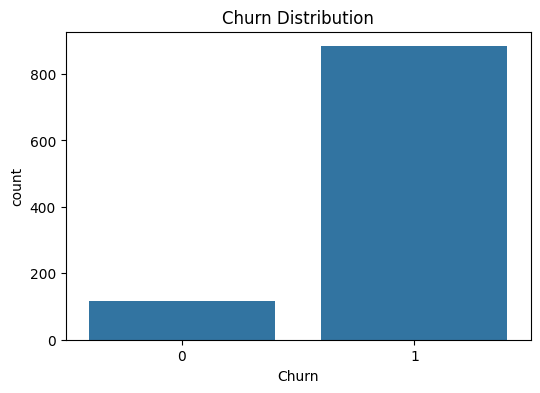

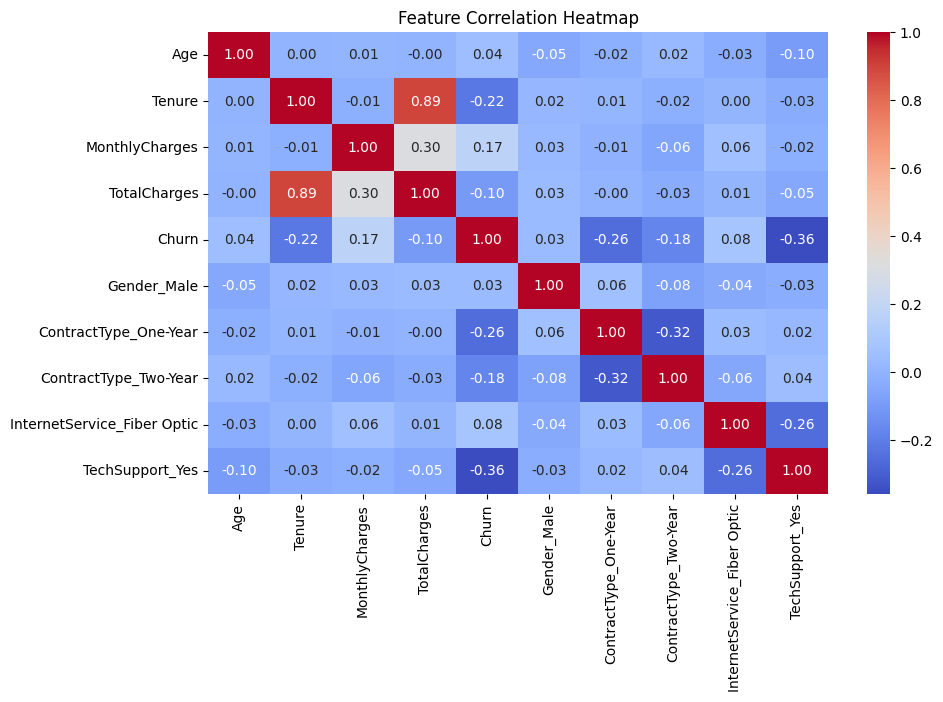

In [12]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



# Define features and target variable

In [13]:

X = df.drop(columns=["Churn"], errors='ignore')
y = df["Churn"]

# Train-test split

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Feature Scaling

In [16]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Logistic Regression

In [17]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_acc:.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log):.2f}\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Performance:
Accuracy: 0.96
Precision: 0.97
Recall: 0.98
F1 Score: 0.98

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.97      0.98      0.98       177

    accuracy                           0.96       200
   macro avg       0.91      0.88      0.90       200
weighted avg       0.96      0.96      0.96       200




# Confusion Matrix for Logistic Regression

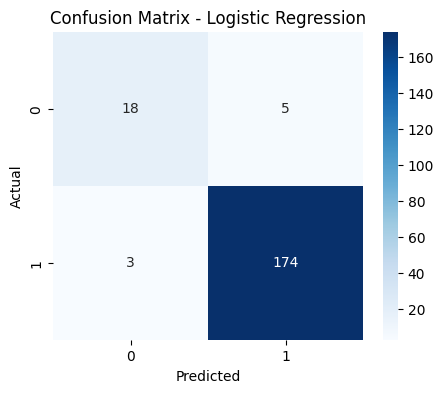

In [19]:

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Random Forest

In [20]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Performance:")
print(f"Accuracy: {rf_acc:.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200




# Confusion Matrix for Random Forest

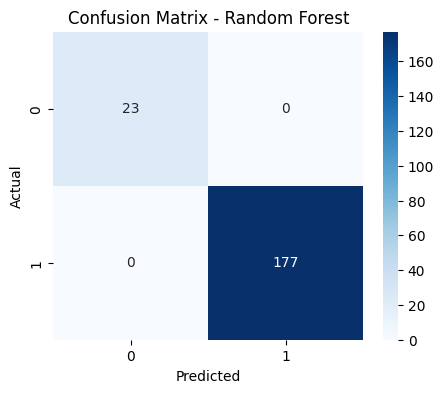

In [21]:

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# XGBoost

In [23]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Performance:")
print(f"Accuracy: {xgb_acc:.2f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.2f}\n")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



c:\Users\VIKAS B S\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:58:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Confusion Matrix for XGBoost

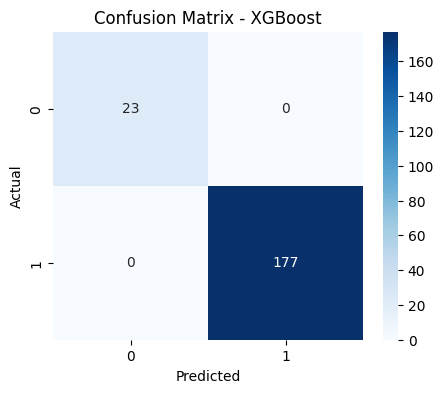

In [24]:

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Feature Importance Visualization

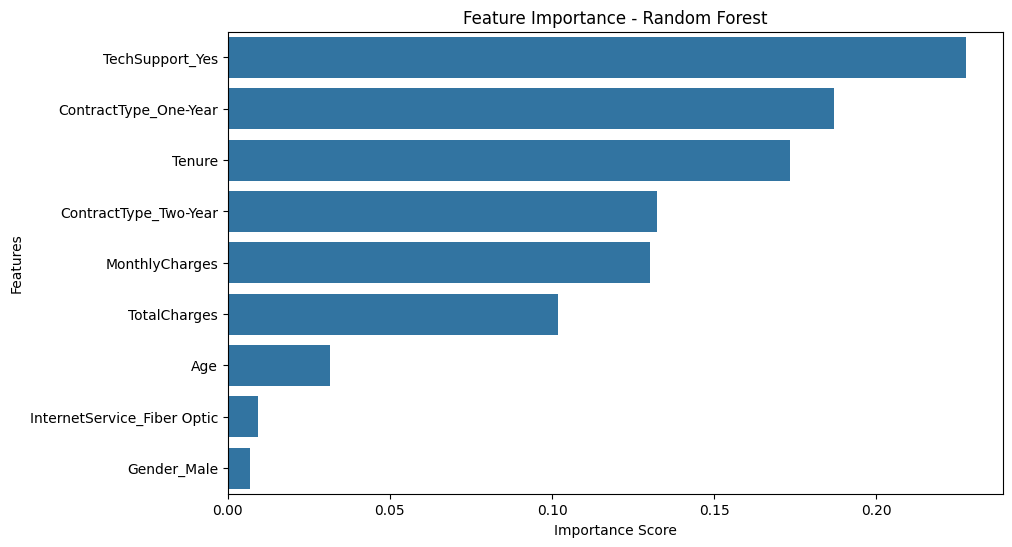

In [25]:

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Model Comparison

In [26]:

print("\nModel Performance Summary:")
print(f"Logistic Regression Accuracy: {log_reg_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"XGBoost Accuracy: {xgb_acc:.2f}")

best_model = max([(log_reg_acc, "Logistic Regression"), (rf_acc, "Random Forest"), (xgb_acc, "XGBoost")])
print(f"\nThe best performing model is {best_model[1]} with an accuracy of {best_model[0]:.2f}")



Model Performance Summary:
Logistic Regression Accuracy: 0.96
Random Forest Accuracy: 1.00
XGBoost Accuracy: 1.00

The best performing model is XGBoost with an accuracy of 1.00
